In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# figure root
fig_root = '../figures'
save_fig = True

In [3]:
e3sm_sivoln_dataH = np.load('e3sm_sivoln_historical.npz')
e3sm_sivols_dataH = np.load('e3sm_sivols_historical.npz')
e3sm_sivoln_dataP = np.load('e3sm_sivoln_ssp585.npz')
e3sm_sivols_dataP = np.load('e3sm_sivols_ssp585.npz')
e3sm_sivoln = np.concatenate((e3sm_sivoln_dataH['data'], e3sm_sivoln_dataP['data']), axis=1)
e3sm_sivols = np.concatenate((e3sm_sivols_dataH['data'], e3sm_sivols_dataP['data']), axis=1)
print(e3sm_sivoln.shape)
ne3sm = e3sm_sivoln.shape[0]

(8, 3000)


In [4]:
esgf_sivoln_dataH = np.load('esgf_sivoln_historical.npz', allow_pickle=True)
esgf_sivoln_dataP = np.load('esgf_sivoln_ssp585.npz', allow_pickle=True)
esgf_sivolnH = esgf_sivoln_dataH['data']
print(esgf_sivolnH.shape)
esgf_sivolnP = esgf_sivoln_dataP['data']
print(esgf_sivolnP.shape)
esgf_timeH = esgf_sivoln_dataH['time']
esgf_timeP = esgf_sivoln_dataP['time']
esgf_sivoln_labelH = list(esgf_sivoln_dataH['label'])
esgf_sivoln_labelP = list(esgf_sivoln_dataP['label'])
sivoln_label = set(esgf_sivoln_labelH).intersection(esgf_sivoln_labelP)
print(len(sivoln_label))
sivoln_label_set = set([lb.split('_')[0] for lb in sivoln_label])
print(len(sivoln_label_set))
print(sivoln_label_set)

(34, 1980)
(20, 1032)
16
11
{'NorESM2-LM', 'ACCESS-ESM1-5', 'NorESM2-MM', 'CESM2-WACCM', 'MPI-ESM1-2-LR', 'IPSL-CM6A-LR', 'ACCESS-CM2', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'CNRM-CM6-1', 'CESM2'}


In [5]:
esgf_sivols_dataH = np.load('esgf_sivols_historical.npz')
esgf_sivols_dataP = np.load('esgf_sivols_ssp585.npz')
esgf_sivolsH = esgf_sivols_dataH['data']
print(esgf_sivolsH.shape)
esgf_sivolsP = esgf_sivols_dataP['data']
print(esgf_sivolsP.shape)
esgf_sivols_labelH = list(esgf_sivols_dataH['label'])
esgf_sivols_labelP = list(esgf_sivols_dataP['label'])
sivols_label = set(esgf_sivols_labelH).intersection(esgf_sivols_labelP)
print(len(sivols_label))
sivols_label_set = set([lb.split('_')[0] for lb in sivols_label])
print(len(sivols_label_set))
print(sivols_label_set)

(34, 1980)
(20, 1032)
16
11
{'NorESM2-LM', 'ACCESS-ESM1-5', 'NorESM2-MM', 'CESM2-WACCM', 'MPI-ESM1-2-LR', 'IPSL-CM6A-LR', 'ACCESS-CM2', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'CNRM-CM6-1', 'CESM2'}


In [6]:
label_intersection = sorted(sivoln_label_set.intersection(sivols_label_set))
print(label_intersection)
label_union = sorted(sivoln_label_set.union(sivols_label_set))
print(label_union)

['ACCESS-CM2', 'ACCESS-ESM1-5', 'CESM2', 'CESM2-WACCM', 'CNRM-CM6-1', 'IPSL-CM6A-LR', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorESM2-LM', 'NorESM2-MM']
['ACCESS-CM2', 'ACCESS-ESM1-5', 'CESM2', 'CESM2-WACCM', 'CNRM-CM6-1', 'IPSL-CM6A-LR', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorESM2-LM', 'NorESM2-MM']


In [7]:
#esgf_colors = np.load('cmip6_colors.npz', allow_pickle=True)['esgf_colors'].flat[0]
cmap = cm.get_cmap('rainbow')
nmodel = len(label_union)
ifrac = np.linspace(0, 1, nmodel)
esgf_colors = {}
for i in np.arange(nmodel):
    esgf_colors[label_union[i]] = cmap(ifrac[i])

esgf_colors['E3SMv1-0-full'] = 'k'
esgf_colors['E3SMv1-0-GHG'] = 'gray'

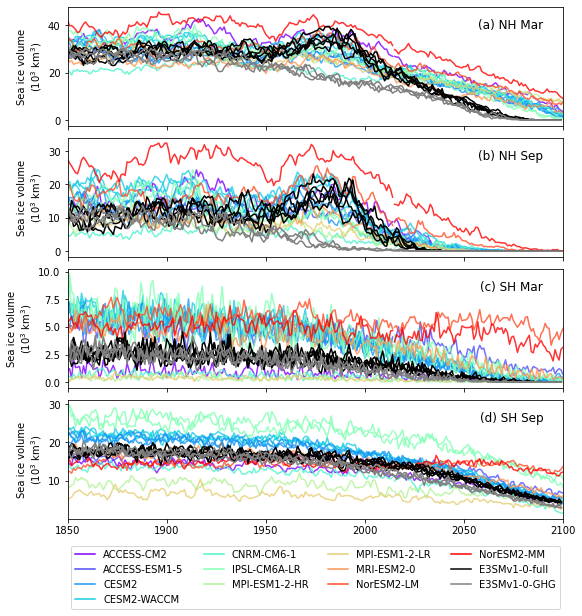

In [8]:
fig, axarr = plt.subplots(4, sharex='col')
fig.set_size_inches([8,9])
models = []
timeH = np.linspace(1850,2014,165)
timeP = np.linspace(2015,2100,86)
e3sm_time = np.linspace(1850,2099,250)
for lb in sorted(sivoln_label):
    mname = lb.split('_')[0]
    color = esgf_colors[mname]
    idx = esgf_sivoln_labelH.index(lb)
    axarr[0].plot(timeH, esgf_sivolnH[idx,2::12], color=color, alpha=0.8)
    axarr[1].plot(timeH, esgf_sivolnH[idx,8::12], color=color, alpha=0.8)
    idx = esgf_sivoln_labelP.index(lb)
    axarr[0].plot(timeP, esgf_sivolnP[idx,2::12], color=color, alpha=0.8)
    axarr[1].plot(timeP, esgf_sivolnP[idx,8::12], color=color, alpha=0.8)

for lb in sorted(sivols_label):
    mname = lb.split('_')[0]
    color = esgf_colors[mname]
    idx = esgf_sivols_labelH.index(lb)
    axarr[2].plot(timeH, esgf_sivolsH[idx,2::12], color=color, alpha=0.8)
    axarr[3].plot(timeH, esgf_sivolsH[idx,8::12], color=color, alpha=0.8)
    idx = esgf_sivols_labelP.index(lb)
    axarr[2].plot(timeP, esgf_sivolsP[idx,2::12], color=color, alpha=0.8)
    axarr[3].plot(timeP, esgf_sivolsP[idx,8::12], color=color, alpha=0.8)

for i in np.arange(ne3sm):
    if i <= 4:
        color = 'k'
    else:
        color = 'gray'
    axarr[0].plot(e3sm_time, e3sm_sivoln[i,2::12], color=color)
    axarr[1].plot(e3sm_time, e3sm_sivoln[i,8::12], color=color)
    axarr[2].plot(e3sm_time, e3sm_sivols[i,2::12], color=color)
    axarr[3].plot(e3sm_time, e3sm_sivols[i,8::12], color=color)
    
for i in np.arange(4):
    axarr[i].set_ylabel('Sea ice volume\n($10^3$ km$^3$)')
    axarr[i].set_xlim([1850,2100])
    

axarr[0].text(0.96, 0.9, '(a) NH Mar', transform=axarr[0].transAxes, fontsize=12,
              color='k', va='top', ha='right')
axarr[1].text(0.96, 0.9, '(b) NH Sep', transform=axarr[1].transAxes, fontsize=12,
              color='k', va='top', ha='right')
axarr[2].text(0.96, 0.9, '(c) SH Mar', transform=axarr[2].transAxes, fontsize=12,
              color='k', va='top', ha='right')
axarr[3].text(0.96, 0.9, '(d) SH Sep', transform=axarr[3].transAxes, fontsize=12,
              color='k', va='top', ha='right')

for key in esgf_colors.keys():
    axarr[3].plot(np.nan, np.nan, color=esgf_colors[key], label=key)
axarr[3].legend(loc='lower center',  bbox_to_anchor=(0.5, -0.8), ncol=4)
plt.subplots_adjust(bottom = 0.17, top=0.96, left=0.09, right=0.95, hspace=0.1)

# save figure
if save_fig:
    figname = fig_root+'/CMIP6_ScenarioMIP_SeaIceVolume.png'
    fig.savefig(figname, dpi = 300)